In [1]:
import os
path = '/home/addinedu/dev_ws/data/machine/cat_dog/train/'
os.listdir(path)

['dog.3830.jpg',
 'dog.7735.jpg',
 'dog.8141.jpg',
 'cat.12339.jpg',
 'cat.7320.jpg',
 'cat.6261.jpg',
 'dog.11859.jpg',
 'dog.1823.jpg',
 'cat.6708.jpg',
 'cat.5261.jpg',
 'dog.6058.jpg',
 'cat.166.jpg',
 'dog.12127.jpg',
 'cat.4810.jpg',
 'cat.4202.jpg',
 'cat.10375.jpg',
 'dog.10325.jpg',
 'cat.36.jpg',
 'cat.5927.jpg',
 'cat.8395.jpg',
 'dog.3282.jpg',
 'dog.4278.jpg',
 'cat.1223.jpg',
 'dog.4409.jpg',
 'dog.4764.jpg',
 'dog.2765.jpg',
 'dog.4658.jpg',
 'cat.2269.jpg',
 'cat.6904.jpg',
 'cat.11162.jpg',
 'cat.634.jpg',
 'dog.8209.jpg',
 'dog.3959.jpg',
 'cat.12185.jpg',
 'dog.3232.jpg',
 'cat.8599.jpg',
 'cat.2807.jpg',
 'cat.8499.jpg',
 'cat.1003.jpg',
 'cat.7794.jpg',
 'cat.3618.jpg',
 'cat.10832.jpg',
 'cat.6315.jpg',
 'cat.2397.jpg',
 'cat.1857.jpg',
 'cat.677.jpg',
 'dog.9542.jpg',
 'cat.11170.jpg',
 'cat.9249.jpg',
 'cat.5067.jpg',
 'cat.8185.jpg',
 'dog.11197.jpg',
 'dog.12378.jpg',
 'dog.2823.jpg',
 'cat.8976.jpg',
 'cat.10135.jpg',
 'dog.3271.jpg',
 'cat.8119.jpg',
 'cat.8

In [2]:
full_names = os.listdir(path)
labels = [each.split('.')[0] for each in full_names]
file_id = [each.split('.')[1] for each in full_names]


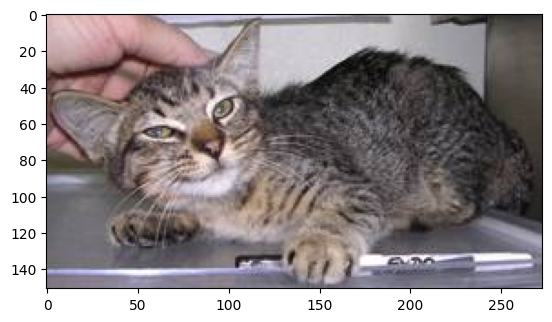

In [3]:
import random 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

sample = random.choice(full_names)
image = mpimg.imread(path + sample)
plt.imshow(image)
plt.show()


In [4]:
sample = random.choice(full_names)
image = mpimg.imread(path + sample)
image.shape

(375, 499, 3)

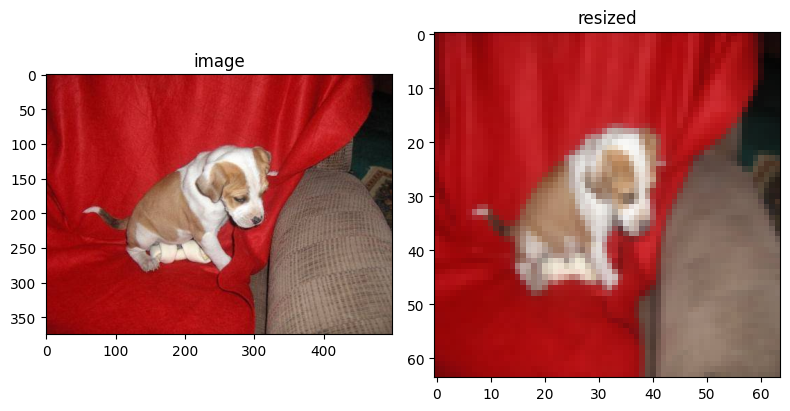

In [11]:
from skimage.transform import resize

resized = resize(image, (64,64,3))
fig, axes = plt.subplots(1, 2, figsize = (8,4))
ax = axes.ravel()

ax[0].imshow(image, cmap = plt.cm.gray)
ax[0].set_title("image")
ax[1].imshow(resized, cmap=plt.cm.gray)
ax[1].set_title("resized")

fig.tight_layout()
plt.show()

In [20]:
from tqdm.notebook import tqdm
from skimage.color import rgb2gray
import numpy as np

images = []
bar_total = tqdm(full_names)
for file in bar_total:
    image = mpimg.imread(path + file)
    images.append(resize(image, (64,64,3)))

images = np.array(images)


  0%|          | 0/25000 [00:00<?, ?it/s]

In [21]:
images.shape, labels[:3]

((25000, 64, 64, 3), ['dog', 'dog', 'dog'])

In [22]:
images[:3]

array([[[[0.22531782, 0.24050556, 0.14829259],
         [0.24805275, 0.2511421 , 0.16325441],
         [0.25510616, 0.25611516, 0.16041886],
         ...,
         [0.61994998, 0.45152237, 0.30689078],
         [0.63755216, 0.4743496 , 0.33053596],
         [0.72375886, 0.54834663, 0.40084359]],

        [[0.25942825, 0.25979623, 0.16143823],
         [0.22245326, 0.20554965, 0.13958158],
         [0.21941766, 0.18566481, 0.14464703],
         ...,
         [0.624422  , 0.44534962, 0.29321386],
         [0.6675473 , 0.49550941, 0.336279  ],
         [0.72487406, 0.56287462, 0.39529588]],

        [[0.22339075, 0.21107036, 0.15085886],
         [0.18824932, 0.16876353, 0.13450598],
         [0.19155844, 0.16364602, 0.14622338],
         ...,
         [0.64602268, 0.46472311, 0.31240348],
         [0.69998372, 0.52865621, 0.36423205],
         [0.73001592, 0.5677556 , 0.3976286 ]],

        ...,

        [[0.33965553, 0.47276171, 0.18748593],
         [0.32353145, 0.48014428, 0.19221853]

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(labels)
labels_encoded = encoder.transform(labels)
labels_encoded[:3], encoder.classes_

(array([1, 1, 1]), array(['cat', 'dog'], dtype='<U3'))

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2,
                                                    random_state=13, stratify=labels_encoded)

X_train.shape , X_test.shape

((20000, 64, 64, 3), (5000, 64, 64, 3))

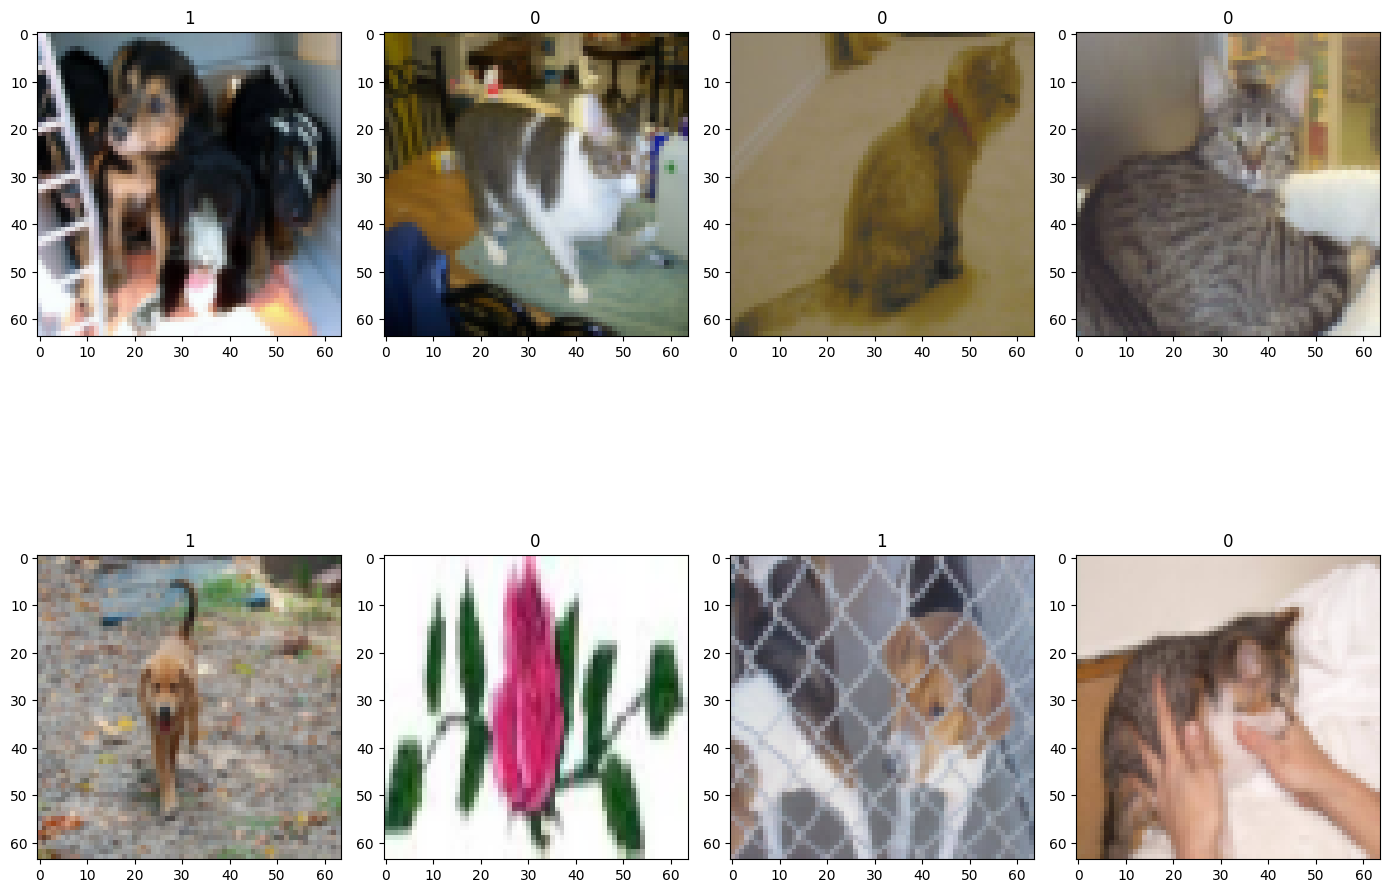

In [26]:
samples = random.choices(population=range(0,20000), k=8)

plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(2,4, idx+1)
    plt.imshow(X_train[n], cmap='Greys', interpolation='nearest')
    plt.title(y_train[n])

plt.tight_layout()
plt.show()

In [33]:
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape = (64,64,3)),
    layers.MaxPooling2D(pool_size=(2,2), strides = (2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=(2,2),),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu', padding = 'same'),
    layers.MaxPooling2D(pool_size=(2,2),),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dropout(0.25),
    layers.Dense(2, activation = 'softmax')

])
model.summary()

/home/addinedu/venv/opencv2_venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 31, 31, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 15, 15, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,663,490 (6.35 MB)

 Trainable params: 1,663,490 (6.35 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

import time

start_time = time.time()
hist = model.fit(X_train.reshape(20000,64,64,3), y_train,
epochs=20, verbose=1,
validation_data = (X_test.reshape(5000,64,64,3), y_test))

print("fit time ", time.time() - start_time)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5628 - loss: 0.6780 - val_accuracy: 0.6722 - val_loss: 0.6115
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7051 - loss: 0.5694 - val_accuracy: 0.7536 - val_loss: 0.5264
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7467 - loss: 0.5107 - val_accuracy: 0.7668 - val_loss: 0.4847
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7802 - loss: 0.4592 - val_accuracy: 0.7948 - val_loss: 0.4416
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7996 - loss: 0.4333 - val_accuracy: 0.8054 - val_loss: 0.4217
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8204 - loss: 0.3951 - val_accuracy: 0.8172 - val_loss: 0.4129
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8350 - loss: 0.3697 - val_accuracy: 0.8130 - val_loss: 0.4169
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8547 - loss: 0.3325 - val_accuracy: 0

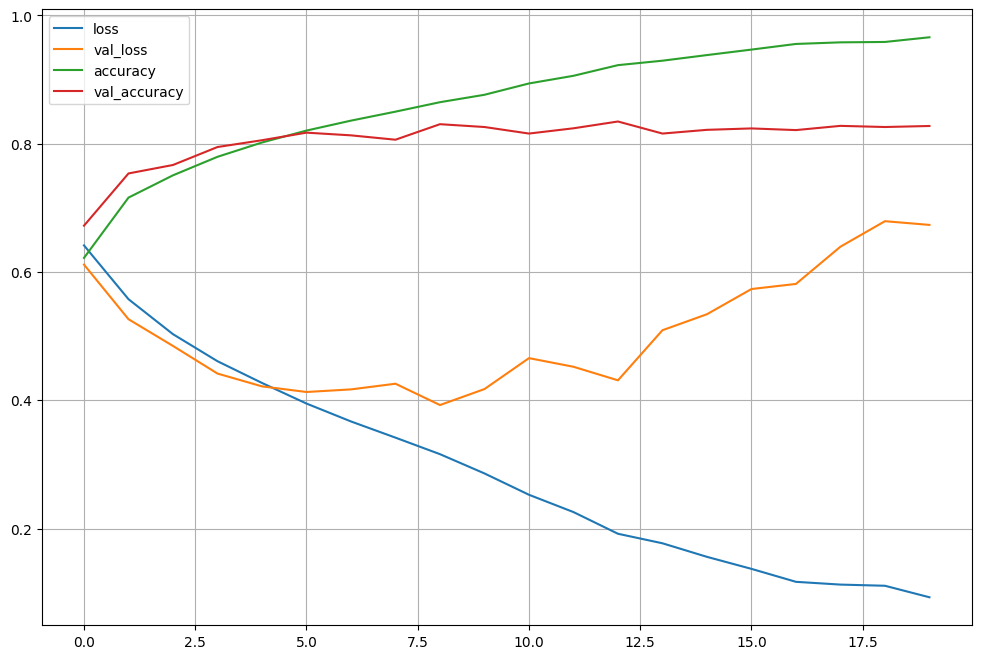

In [35]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy' ]
plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)

plt.legend()
plt.grid()
plt.show()
